# Demanda Electrica

## Paquetes(Explica con codigo)

In [ ]:
pip install -q skforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.4/851.4 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.recursive import ForecasterRecursive
from skforecast.model_selection import TimeSeriesFold, grid_search_forecaster, backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Analisis Exploratorio

### Cargando datos(Explica con codigo)

In [ ]:
data = pd.read_excel("DemandaCOES_.xlsx",skiprows=3)

[Datos](https://www.coes.org.pe/Portal/portalinformacion/demanda?indicador=maxima)

### Formando de tiempo(Explica con codigo)

In [ ]:
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%d/%m/%Y %H:%M')
data.set_index('FECHA',inplace=True)
data.rename(columns={'EJECUTADO':'Demand'},inplace=True)
data = data.asfreq("30min")
data.head()

,Demand
FECHA,
2023-01-01 00:30:00,6120.78000
2023-01-01 01:00:00,6010.91339
2023-01-01 01:30:00,5946.83300
2023-01-01 02:00:00,5846.17000
2023-01-01 02:30:00,5756.13500


In [ ]:
data.index

DatetimeIndex(['2023-01-01 00:30:00', '2023-01-01 01:00:00',
               '2023-01-01 01:30:00', '2023-01-01 02:00:00',
               '2023-01-01 02:30:00', '2023-01-01 03:00:00',
               '2023-01-01 03:30:00', '2023-01-01 04:00:00',
               '2023-01-01 04:30:00', '2023-01-01 05:00:00',
               ...
               '2024-08-31 19:30:00', '2024-08-31 20:00:00',
               '2024-08-31 20:30:00', '2024-08-31 21:00:00',
               '2024-08-31 21:30:00', '2024-08-31 22:00:00',
               '2024-08-31 22:30:00', '2024-08-31 23:00:00',
               '2024-08-31 23:30:00', '2024-09-01 00:00:00'],
              dtype='datetime64[ns]', name='FECHA', length=29232, freq='30min')

### Visualizando Serie(Explica con codigo)

<Axes: xlabel='FECHA'>

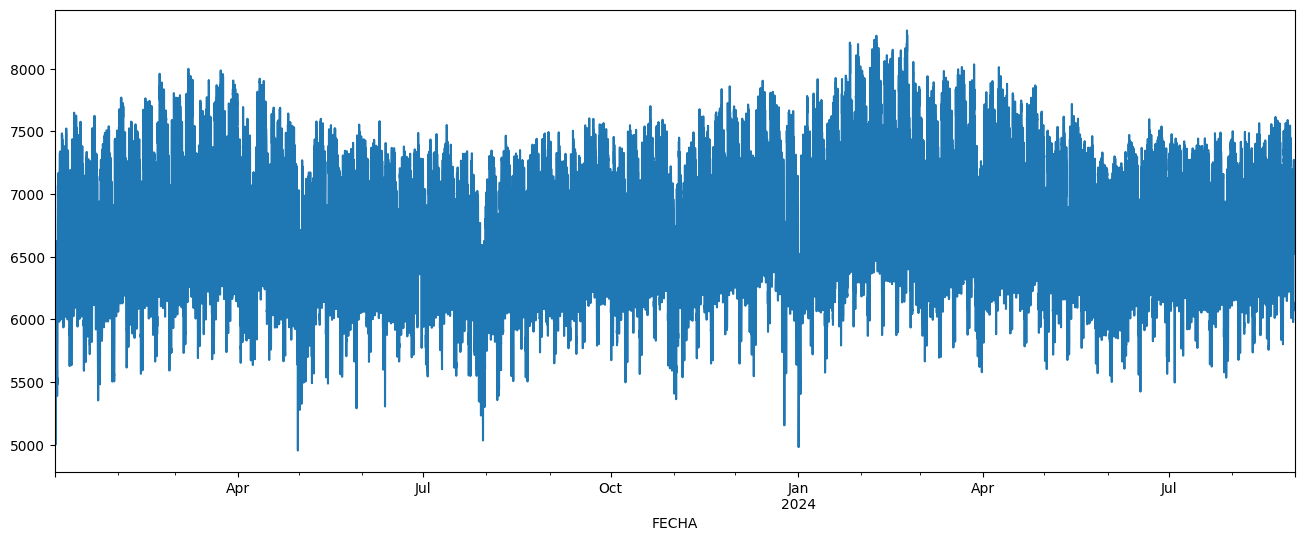

In [ ]:
data.Demand.plot(figsize=(16,6))

### Analisis de tendencia(Explica sin codigo)

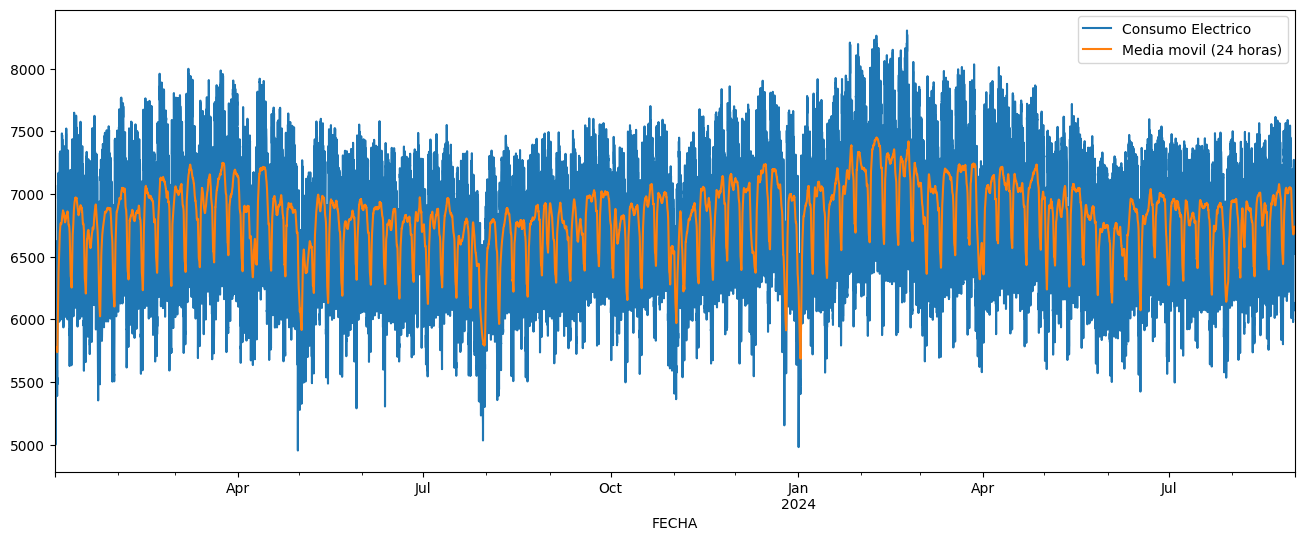

In [ ]:
data.Demand.plot(figsize=(16,6),label="Consumo Electrico")
data.Demand.rolling(48).mean().plot(label='Media movil (24 horas)')
plt.legend()
plt.show()

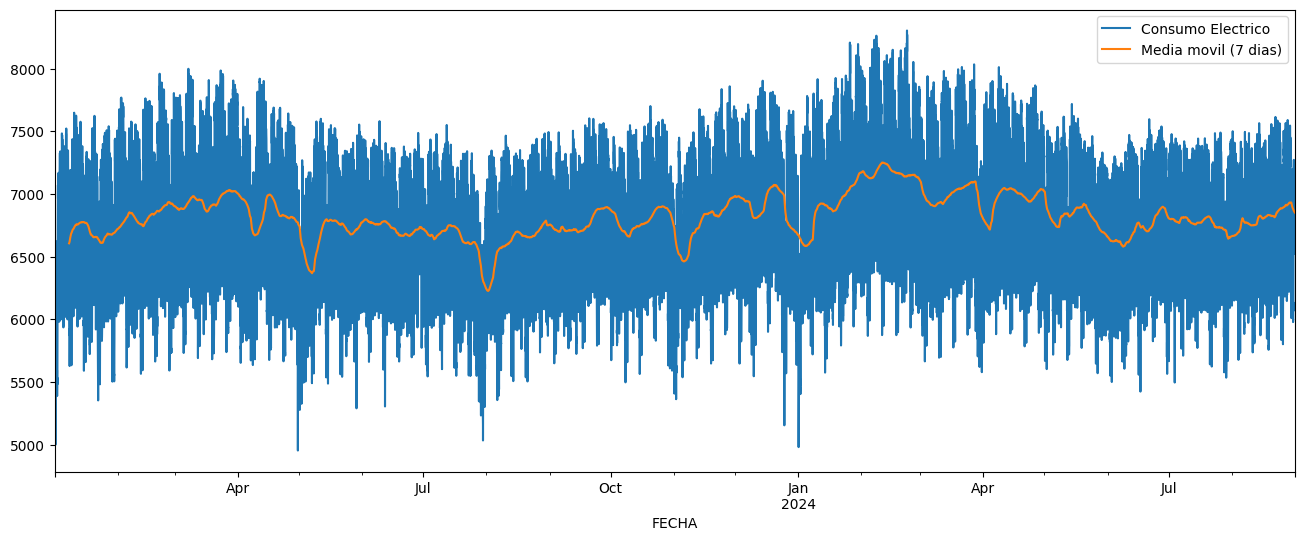

In [ ]:
data.Demand.plot(figsize=(16,6),label="Consumo Electrico")
data.Demand.rolling(48*7).mean().plot(label='Media movil (7 dias)')
plt.legend()
plt.show()

## Featuring engineers

### Efecto Ciclico(Explica sin codigo)

In [ ]:
data['ciclo'] =

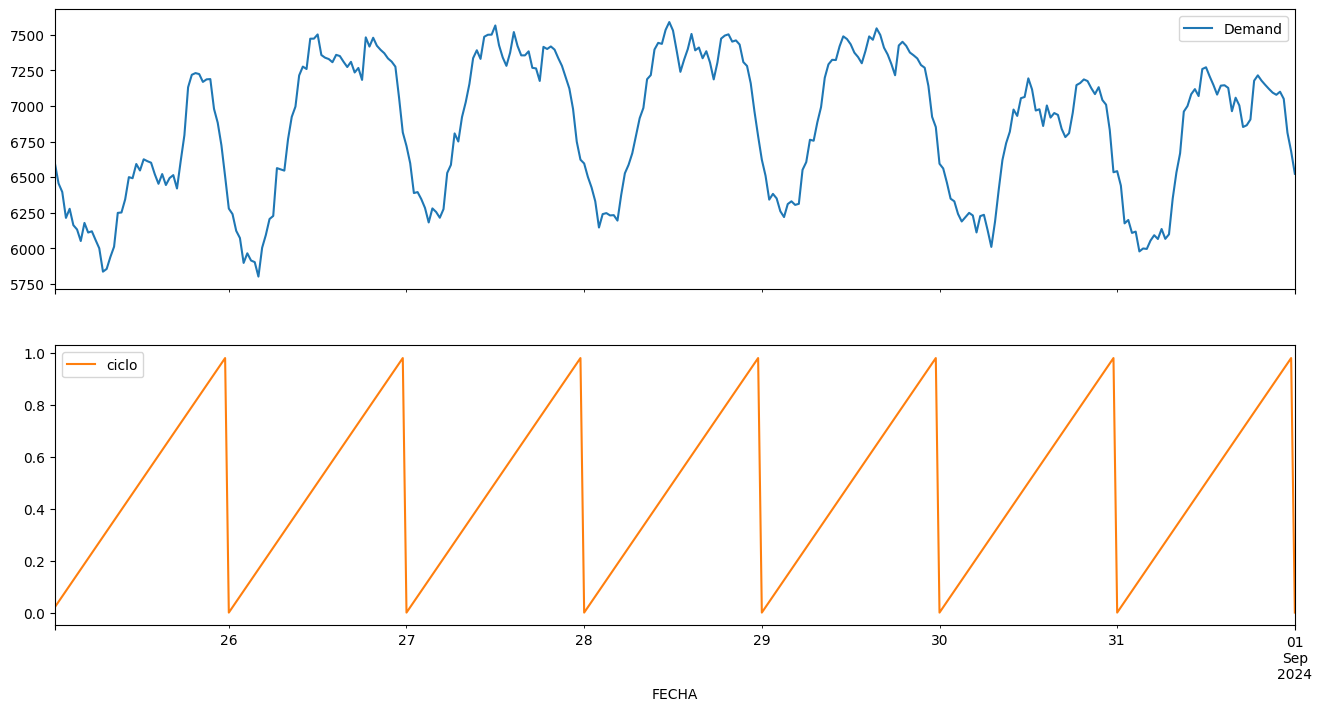

In [ ]:
data[['Demand','ciclo']][-48*7:].plot(figsize=(16,8),subplots=True)
plt.show()

### Efecto Diario(Explica con codigo)

In [ ]:
days_translation = {
    'Monday': '1Lunes',
    'Tuesday': '2Martes',
    'Wednesday': '3Miércoles',
    'Thursday': '4Jueves',
    'Friday': '5Viernes',
    'Saturday': '6Sábado',
    'Sunday': '0Domingo'
}

In [ ]:
data['dia'] =

In [ ]:
data2 = pd.get_dummies(data,columns=['dia'], dtype=int)

In [ ]:
data2.columns

Index(['Demand', 'ciclo', 'dia_0Domingo', 'dia_1Lunes', 'dia_2Martes',
       'dia_3Miércoles', 'dia_4Jueves', 'dia_5Viernes', 'dia_6Sábado'],
      dtype='object')

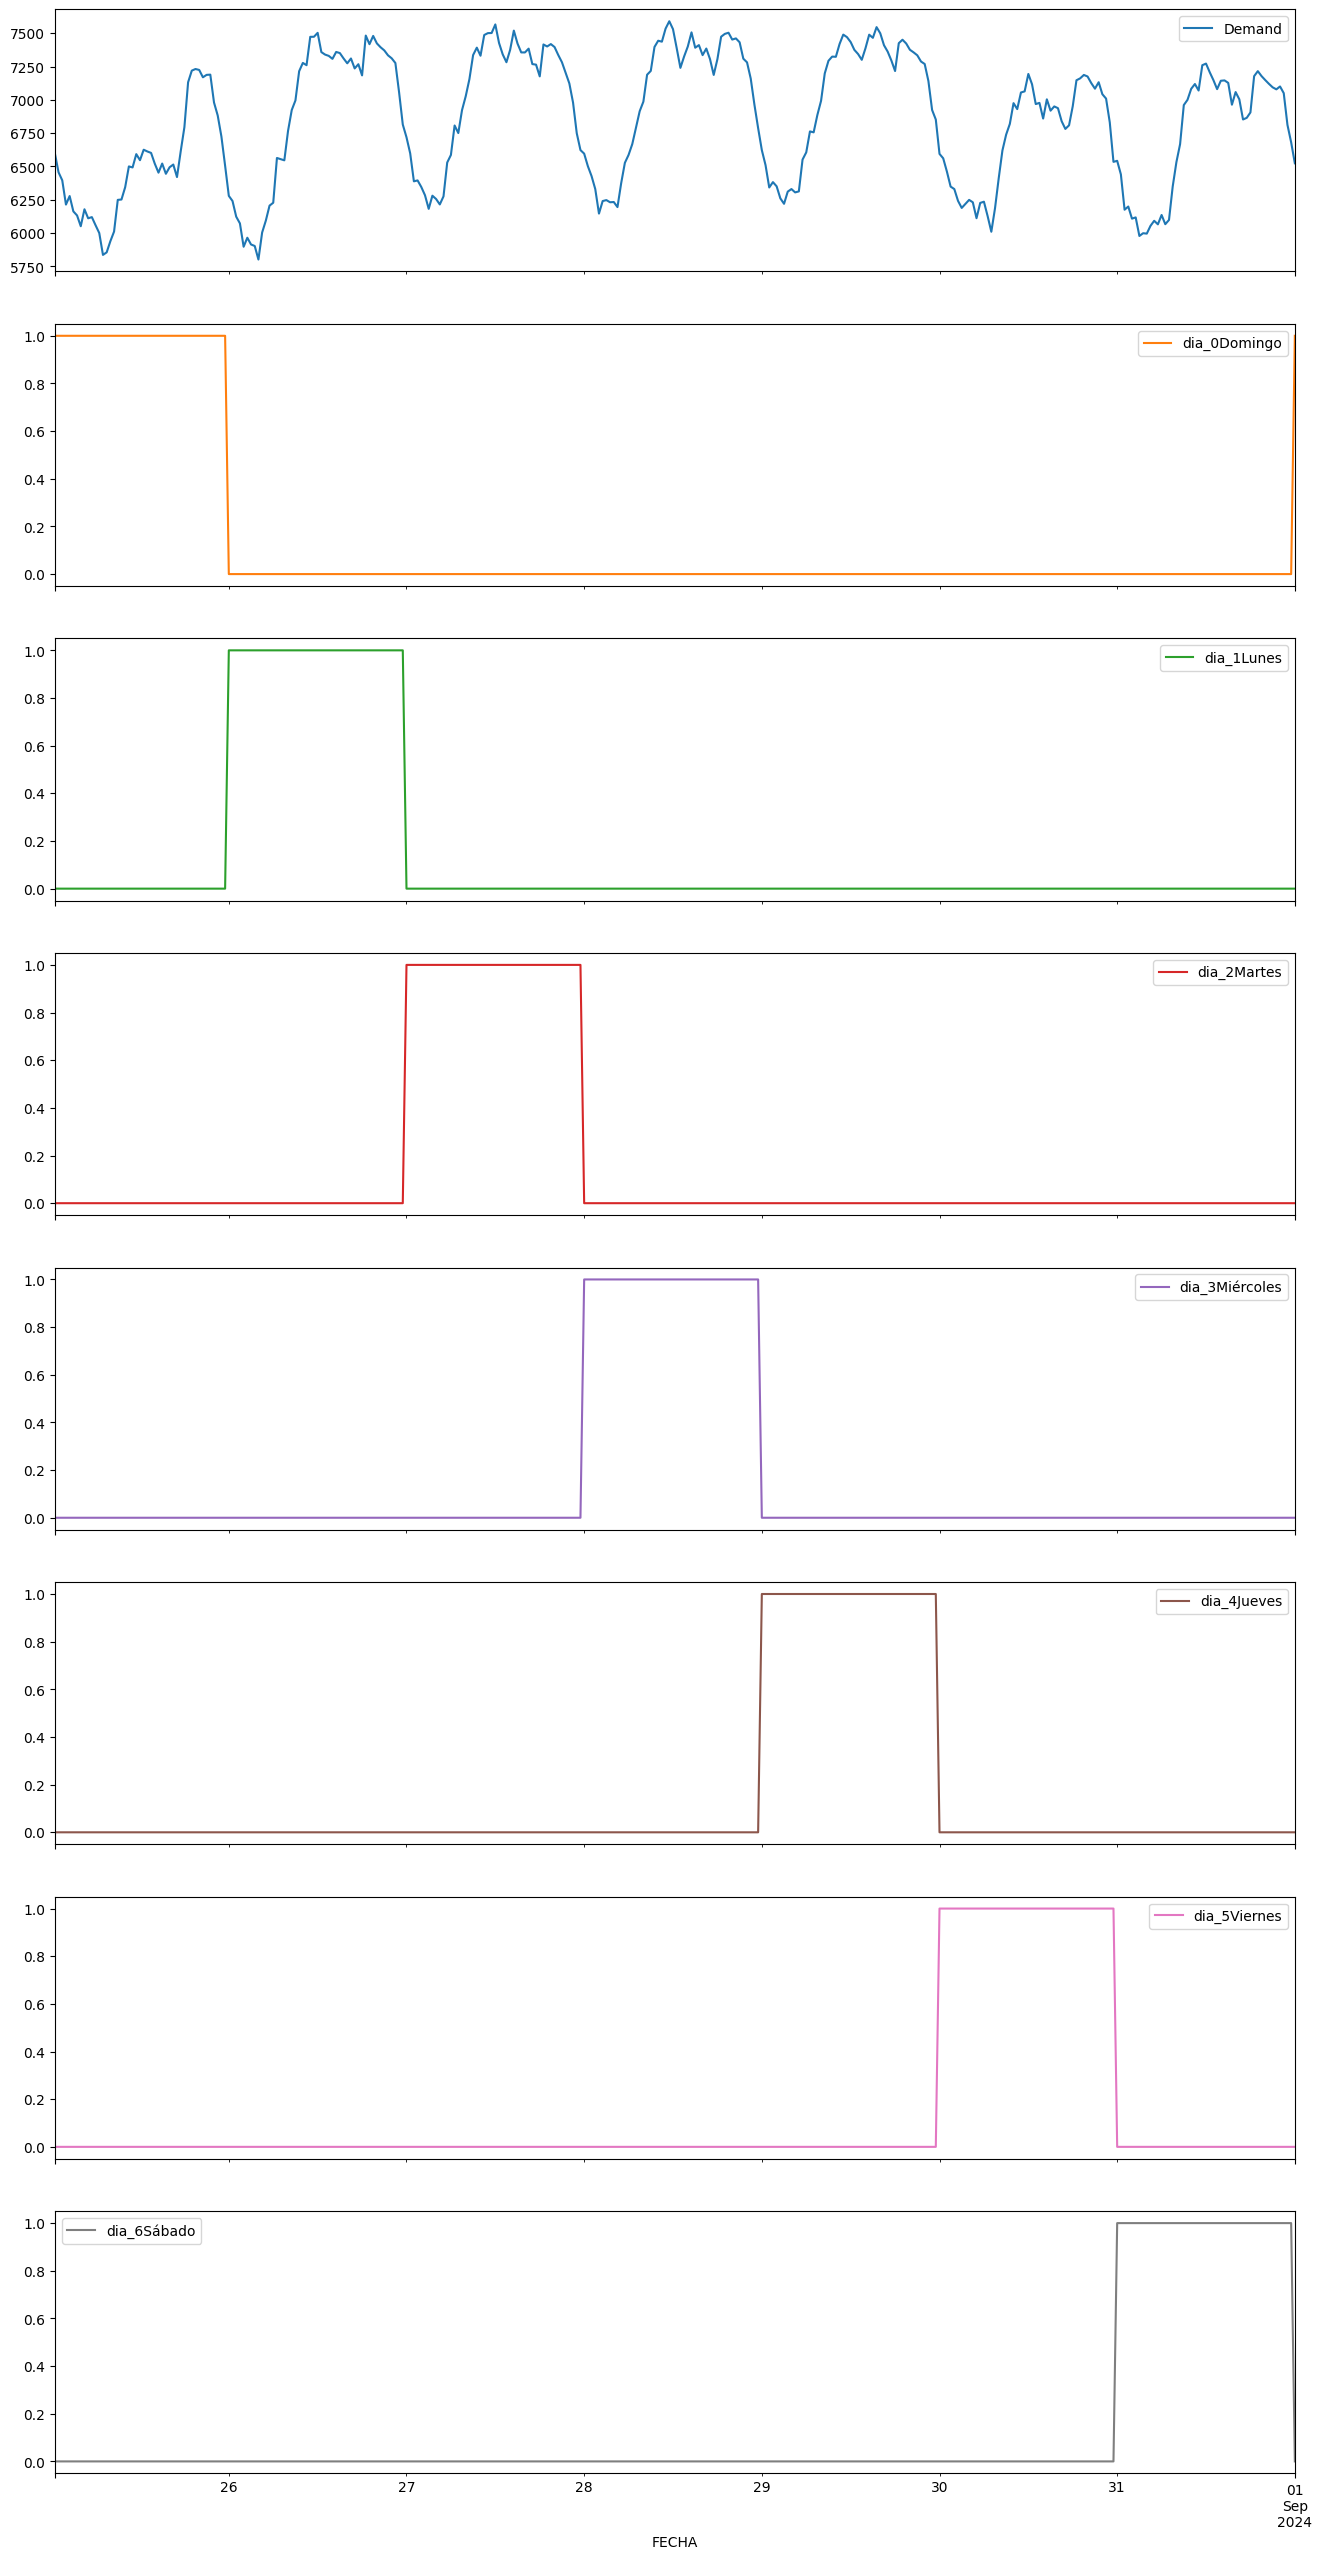

In [ ]:
data2[['Demand','dia_0Domingo','dia_1Lunes','dia_2Martes','dia_3Miércoles','dia_4Jueves','dia_5Viernes','dia_6Sábado']][-48*7:].plot(figsize=(16,32),subplots=True)
plt.show()

### Efecto Feriado(Explica con codigo)

In [ ]:
import holidays

In [ ]:
pe =
data2['feriado'] =

/tmp/ipython-input-1481387905.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data2['feriado'] = data2.index.normalize().isin(pe).astype(int)


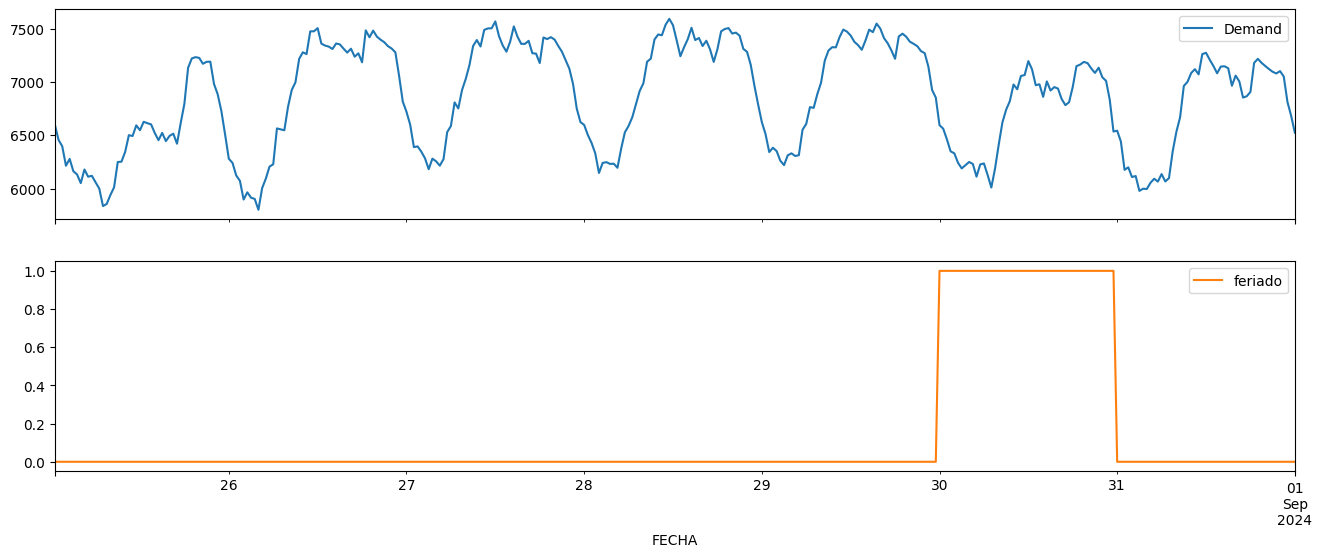

In [ ]:
data2[['Demand','feriado']][-48*7:].plot(figsize=(16,6),subplots=True)
plt.show()

## Modelamiento

### Particion de datos(Explica con codigo)

In [ ]:
steps = 48*7#separar la ultima semana
x_train =
x_test  =
y_train =
y_test  =

### Modelo autorregresivo (univariado)(Explica sin codigo)

In [ ]:
# Hyperparameters: grid search
# ==============================================================================
forecaster = ForecasterRecursive(
                 regressor = ,
                 lags      =
             )

In [ ]:
# Training and validation folds
cv = TimeSeriesFold(
      steps              = ,
      initial_train_size = ,
      refit              = ,
      fixed_train_size   =
    )

In [ ]:
# Candidate values for lags
lags_grid = []

In [ ]:
# Candidate values for regressor's hyperparameters
param_grid = {
    'n_estimators': [],
    'max_depth': []
}

In [ ]:
results_grid = grid_search_forecaster(
                    forecaster  = forecaster,
                    y           = y_train,
                    cv          = cv,
                    param_grid  = param_grid,
                    lags_grid   = lags_grid,
                    metric      = 'mean_squared_error',
                    return_best = True,
                    n_jobs      = 'auto',
                    verbose     = False)

lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/2 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96] 
  Parameters: {'max_depth': 8, 'n_estimators': 250}
  Backtesting metric: 10589.759750347379


In [ ]:
regressor = XGBRegressor(n_estimators=, max_depth=, random_state=)
forecaster = ForecasterRecursive(
                 regressor = ,
                 lags      =
             )
forecaster.fit(y=)

In [ ]:
predictions = forecaster.predict(steps=)

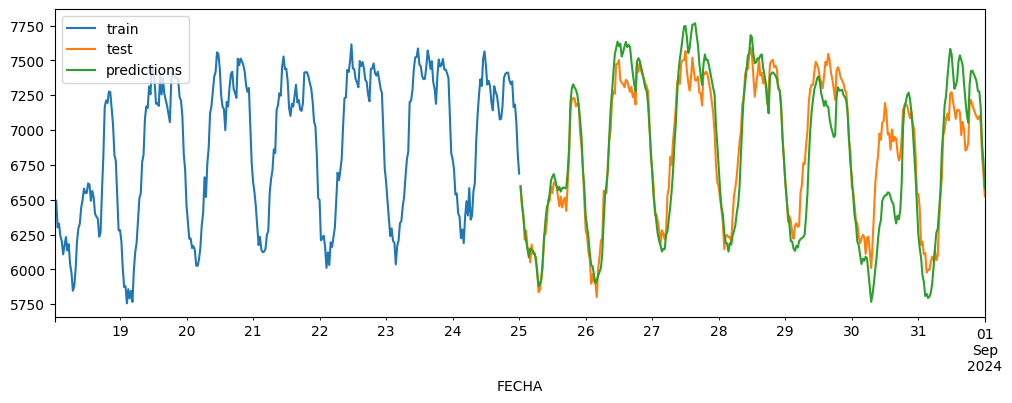

In [ ]:
error_mse1 = mean_squared_error(
                y_true = ,
                y_pred =
            )
print(f"Test error 1 (MSE): {error_mse1}")

Test error 1 (MSE): 47730.74608560428


### Modelo Autorregresivo y Multivariado(Explica sin codigo)

In [ ]:
forecaster = ForecasterRecursive(
                 regressor = ,
                 lags      =
             )

In [ ]:
cv = TimeSeriesFold(
      steps              = ,
      initial_train_size = ,
      refit              = False,
      fixed_train_size   = False
    )

In [ ]:
# Candidate values for lags
lags_grid = []

# Candidate values for regressor's hyperparameters
param_grid = {
    'n_estimators': [],
    'max_depth': []
}

In [ ]:
results_grid = grid_search_forecaster(
                    forecaster  = forecaster,
                    y           = y_train,
                    exog        = x_train,
                    cv          = cv,
                    param_grid  = param_grid,
                    lags_grid   = lags_grid,
                    metric      = 'mean_squared_error',
                    return_best = True,
                    n_jobs      = 'auto',
                    verbose     = False
                )

lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'max_depth': 3, 'n_estimators': 250}
  Backtesting metric: 10453.346769016607


In [ ]:
regressor = XGBRegressor(n_estimators=, max_depth=, random_state=)
forecaster = ForecasterRecursive(
                 regressor = ,
                 lags      =
             )
forecaster.fit(y = , exog = )

In [ ]:
predictions = forecaster.predict(steps=, exog = )

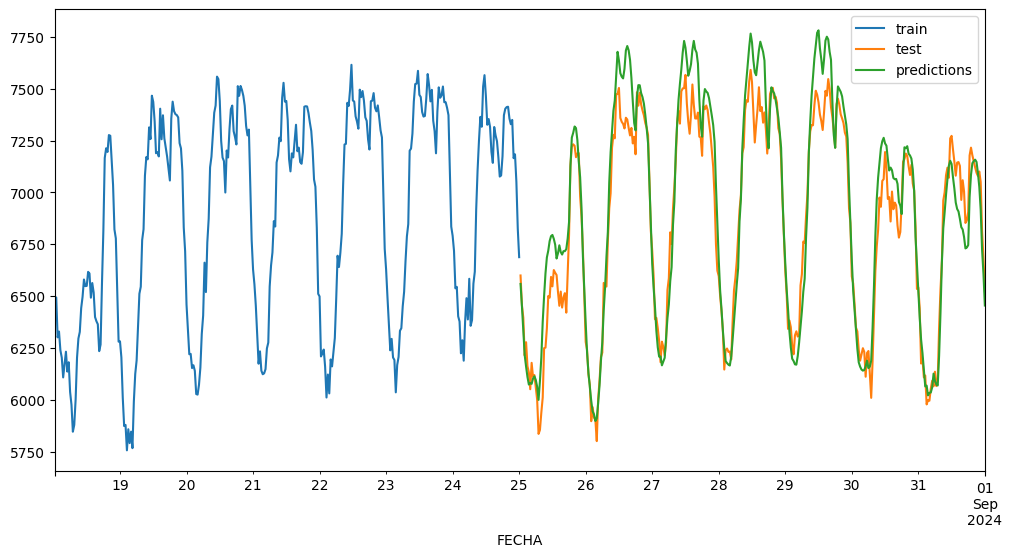

In [ ]:
error_mse2 = mean_squared_error(
                y_true = ,
                y_pred =
            )
print(f"Test error 2 (MSE): {error_mse2}")

Test error 2 (MSE): 22589.882973410473
